In [112]:
## Milestone Assignment 1 
## BAN 6800
## Submitted by Muhammad Farez Omair Khan

## Importing Necessary Library
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset (source: https://www.kaggle.com/datasets/shiveshprakash/34-year-daily-stock-data)
df = pd.read_csv(r"C:\Users\Farez Laptop\Dropbox\My PC (DESKTOP-0DN7O4V)\Desktop\Capstone Project\data_final.csv")

# Displaying first 5 rows
print(df.head())

# Checking data types and missing values
print(df.info())
print(df.isnull().sum())


           dt    vix       sp500  sp500_volume     djia  djia_volume  \
0  03/01/1990  18.19  358.760010     192330000  2809.73        23.62   
1  04/01/1990  19.22  355.670013     177000000  2796.08        24.37   
2  05/01/1990  20.11  352.200012     158530000  2773.25        20.29   
3  08/01/1990  20.26  353.790009     140110000  2794.37        16.61   
4  09/01/1990  22.20  349.619995     155210000  2766.00        15.80   

           hsi       ads  us3m  joblessness         epu        GPRD  \
0  2858.699951 -0.229917  7.89            3  100.359178   75.408051   
1  2868.000000 -0.246065  7.84            3  100.359178   56.085804   
2  2839.899902 -0.260393  7.79            3  100.359178   63.847675   
3  2816.000000 -0.291750  7.79            3  100.359178  102.841156   
4  2822.000000 -0.297326  7.80            3  100.359178  138.435669   

     prev_day  
0  359.690002  
1  358.760010  
2  355.670013  
3  352.200012  
4  353.790009  
<class 'pandas.core.frame.DataFrame'>
RangeI

In [113]:
print(df['dt'].head(10))  # Checking the first 10 rows


0    03/01/1990
1    04/01/1990
2    05/01/1990
3    08/01/1990
4    09/01/1990
5    10/01/1990
6    11/01/1990
7    12/01/1990
8    15/01/1990
9    16/01/1990
Name: dt, dtype: object


In [114]:
# Converting date column to datetime, considering day-first format
df['dt'] = pd.to_datetime(df['dt'], dayfirst=True)

# Setting the date as index
df.set_index('dt', inplace=True)

print(df.head())  # Confirming changes


              vix       sp500  sp500_volume     djia  djia_volume  \
dt                                                                  
1990-01-03  18.19  358.760010     192330000  2809.73        23.62   
1990-01-04  19.22  355.670013     177000000  2796.08        24.37   
1990-01-05  20.11  352.200012     158530000  2773.25        20.29   
1990-01-08  20.26  353.790009     140110000  2794.37        16.61   
1990-01-09  22.20  349.619995     155210000  2766.00        15.80   

                    hsi       ads  us3m  joblessness         epu        GPRD  \
dt                                                                             
1990-01-03  2858.699951 -0.229917  7.89            3  100.359178   75.408051   
1990-01-04  2868.000000 -0.246065  7.84            3  100.359178   56.085804   
1990-01-05  2839.899902 -0.260393  7.79            3  100.359178   63.847675   
1990-01-08  2816.000000 -0.291750  7.79            3  100.359178  102.841156   
1990-01-09  2822.000000 -0.297326  7

In [115]:
print(df.index.dtype)  # Should show 'datetime64[ns]'
print(df.head())  # Confirming changes


datetime64[ns]
              vix       sp500  sp500_volume     djia  djia_volume  \
dt                                                                  
1990-01-03  18.19  358.760010     192330000  2809.73        23.62   
1990-01-04  19.22  355.670013     177000000  2796.08        24.37   
1990-01-05  20.11  352.200012     158530000  2773.25        20.29   
1990-01-08  20.26  353.790009     140110000  2794.37        16.61   
1990-01-09  22.20  349.619995     155210000  2766.00        15.80   

                    hsi       ads  us3m  joblessness         epu        GPRD  \
dt                                                                             
1990-01-03  2858.699951 -0.229917  7.89            3  100.359178   75.408051   
1990-01-04  2868.000000 -0.246065  7.84            3  100.359178   56.085804   
1990-01-05  2839.899902 -0.260393  7.79            3  100.359178   63.847675   
1990-01-08  2816.000000 -0.291750  7.79            3  100.359178  102.841156   
1990-01-09  2822.0000

In [116]:
## Cleaning the Data
# Step 1: Drop rows with too many missing values
df.dropna(thresh=len(df.columns) - 2, inplace=True)  # Keep rows with at least 2 non-null values

# Step 2: Fill missing values with forward fill (previous day's value)
df.fillna(method='ffill', inplace=True)

# Step 3: Interpolation for smooth transition
df.interpolate(method='linear', inplace=True)

print(df.isnull().sum())  # Checking again for missing values


vix             0
sp500           0
sp500_volume    0
djia            0
djia_volume     0
hsi             0
ads             0
us3m            0
joblessness     0
epu             0
GPRD            0
prev_day        0
dtype: int64


C:\Users\Farez Laptop\AppData\Local\Temp\ipykernel_824\3328518276.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)



Basic Statistics:
                vix         sp500  sp500_volume          djia   djia_volume  \
count  8.597000e+03  8.597000e+03  8.597000e+03  8.597000e+03  8.597000e+03   
mean   1.371991e-16  1.851362e-16  2.300978e-15 -1.719122e-16 -1.520761e-16   
std    1.000058e+00  1.000058e+00  1.000058e+00  1.000058e+00  1.000058e+00   
min   -1.318639e+00 -1.176297e+00 -4.472692e+00 -1.252162e+00 -1.358457e+00   
25%   -7.226113e-01 -6.309589e-01 -7.442563e-01 -6.233378e-01 -8.936336e-01   
50%   -2.316163e-01 -2.951176e-01  4.426179e-01 -3.121413e-01 -3.992275e-02   
75%    4.302147e-01  4.178786e-01  7.941027e-01  4.403353e-01  6.690216e-01   
max    7.988754e+00  3.103552e+00  1.682266e+00  2.785903e+00  5.532652e+00   

                hsi           ads          us3m   joblessness           epu  \
count  8.597000e+03  8.597000e+03  8.597000e+03  8.597000e+03  8.597000e+03   
mean   3.074583e-16  1.012463e-17 -6.612006e-17  7.934408e-17 -1.256281e-16   
std    1.000058e+00  1.000058e+0

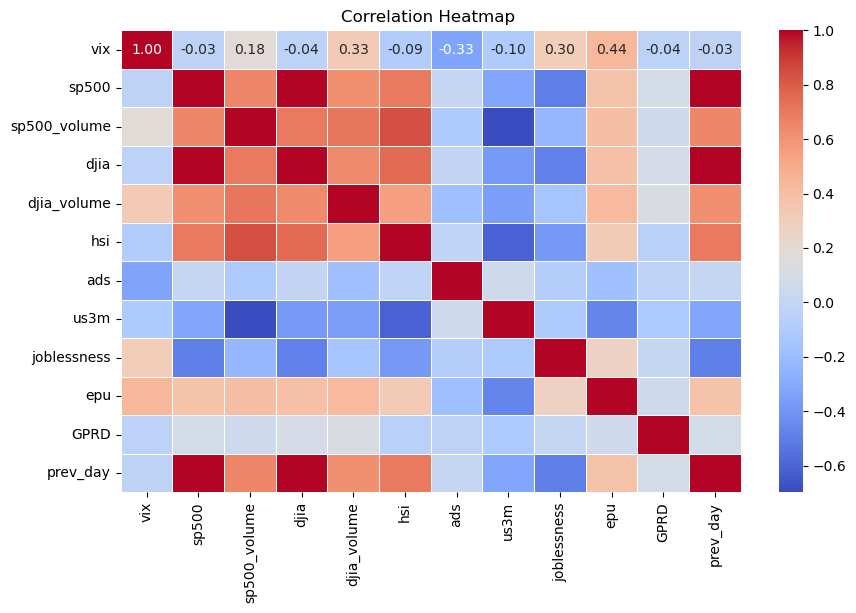


Variance Inflation Factor (VIF) Analysis:
         Feature          VIF
0            vix     2.056190
1          sp500  2857.322600
2   sp500_volume     7.555271
3           djia   212.169151
4    djia_volume     3.033461
5            hsi     7.531380
6            ads     1.148269
7           us3m     3.097616
8    joblessness     2.195831
9            epu     2.315146
10          GPRD     1.204890
11      prev_day  2680.914869


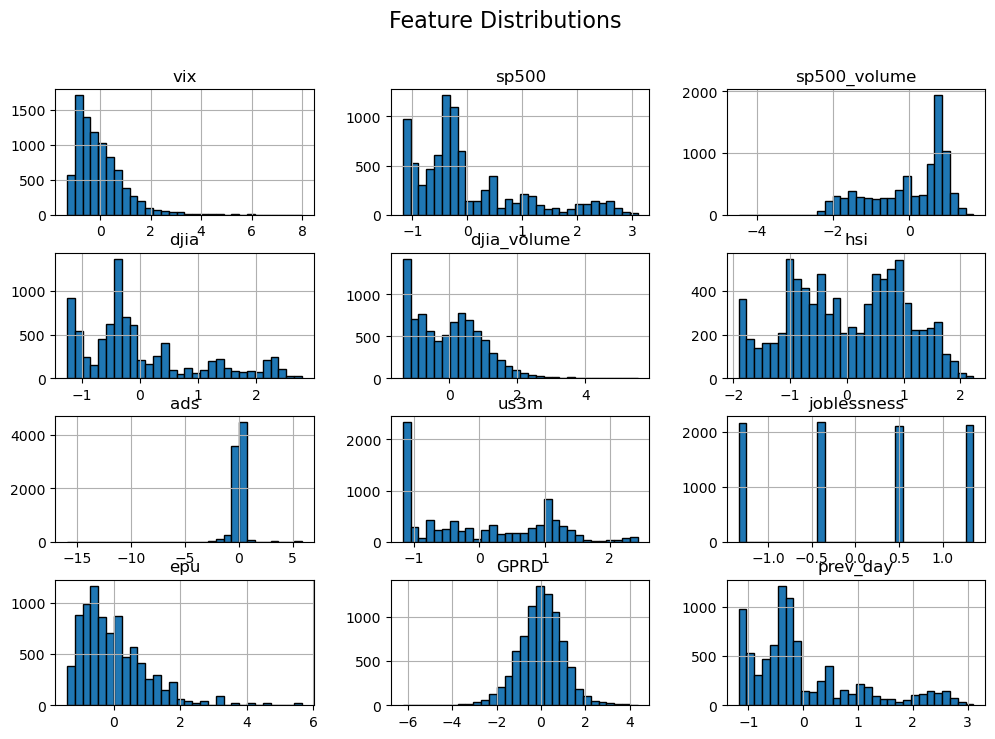

In [117]:

## ---------------- Exploratory Data Analysis ----------------

# ---------------- Basic Statistics ----------------
print("\nBasic Statistics:")
print(df_scaled.describe())  # Summary statistics

# ---------------- Correlation Analysis ----------------
plt.figure(figsize=(10, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap ")
plt.show()

# ---------------- Variance Inflation Factor (VIF) Analysis ----------------
vif_data = pd.DataFrame()
vif_data["Feature"] = df_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) for i in range(df_scaled.shape[1])]

print("\nVariance Inflation Factor (VIF) Analysis:")
print(vif_data)

# ---------------- Feature Distributions ----------------
df_scaled.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [118]:
## Feature Engineering 
# Moving Averages
df['sp500_7d_ma'] = df['sp500'].rolling(window=7).mean()
df['sp500_30d_ma'] = df['sp500'].rolling(window=30).mean()

# Volatility Indicator (Standard Deviation over 7 days)
df['sp500_volatility'] = df['sp500'].rolling(window=7).std()

# Previous Day's Closing Price
df['prev_day_price'] = df['sp500'].shift(1)

print(df.head())  # Confirming new features


              vix       sp500  sp500_volume     djia  djia_volume  \
dt                                                                  
1990-01-03  18.19  358.760010     192330000  2809.73        23.62   
1990-01-04  19.22  355.670013     177000000  2796.08        24.37   
1990-01-05  20.11  352.200012     158530000  2773.25        20.29   
1990-01-08  20.26  353.790009     140110000  2794.37        16.61   
1990-01-09  22.20  349.619995     155210000  2766.00        15.80   

                    hsi       ads  us3m  joblessness         epu        GPRD  \
dt                                                                             
1990-01-03  2858.699951 -0.229917  7.89            3  100.359178   75.408051   
1990-01-04  2868.000000 -0.246065  7.84            3  100.359178   56.085804   
1990-01-05  2839.899902 -0.260393  7.79            3  100.359178   63.847675   
1990-01-08  2816.000000 -0.291750  7.79            3  100.359178  102.841156   
1990-01-09  2822.000000 -0.297326  7

In [119]:
# Final checking for missing values
print(df.isnull().sum())

# Checking data types
print(df.dtypes)


vix                  0
sp500                0
sp500_volume         0
djia                 0
djia_volume          0
hsi                  0
ads                  0
us3m                 0
joblessness          0
epu                  0
GPRD                 0
prev_day             0
sp500_7d_ma          6
sp500_30d_ma        29
sp500_volatility     6
prev_day_price       1
dtype: int64
vix                 float64
sp500               float64
sp500_volume          int64
djia                float64
djia_volume         float64
hsi                 float64
ads                 float64
us3m                float64
joblessness           int64
epu                 float64
GPRD                float64
prev_day            float64
sp500_7d_ma         float64
sp500_30d_ma        float64
sp500_volatility    float64
prev_day_price      float64
dtype: object


In [120]:
## Preprocessing the data again while filling missing values
df.ffill(inplace=True)  # Forward fill missing values
df.bfill(inplace=True)  # Backward fill as a backup


In [121]:
print(df.isnull().sum())  # Final check for cleaned data


vix                 0
sp500               0
sp500_volume        0
djia                0
djia_volume         0
hsi                 0
ads                 0
us3m                0
joblessness         0
epu                 0
GPRD                0
prev_day            0
sp500_7d_ma         0
sp500_30d_ma        0
sp500_volatility    0
prev_day_price      0
dtype: int64


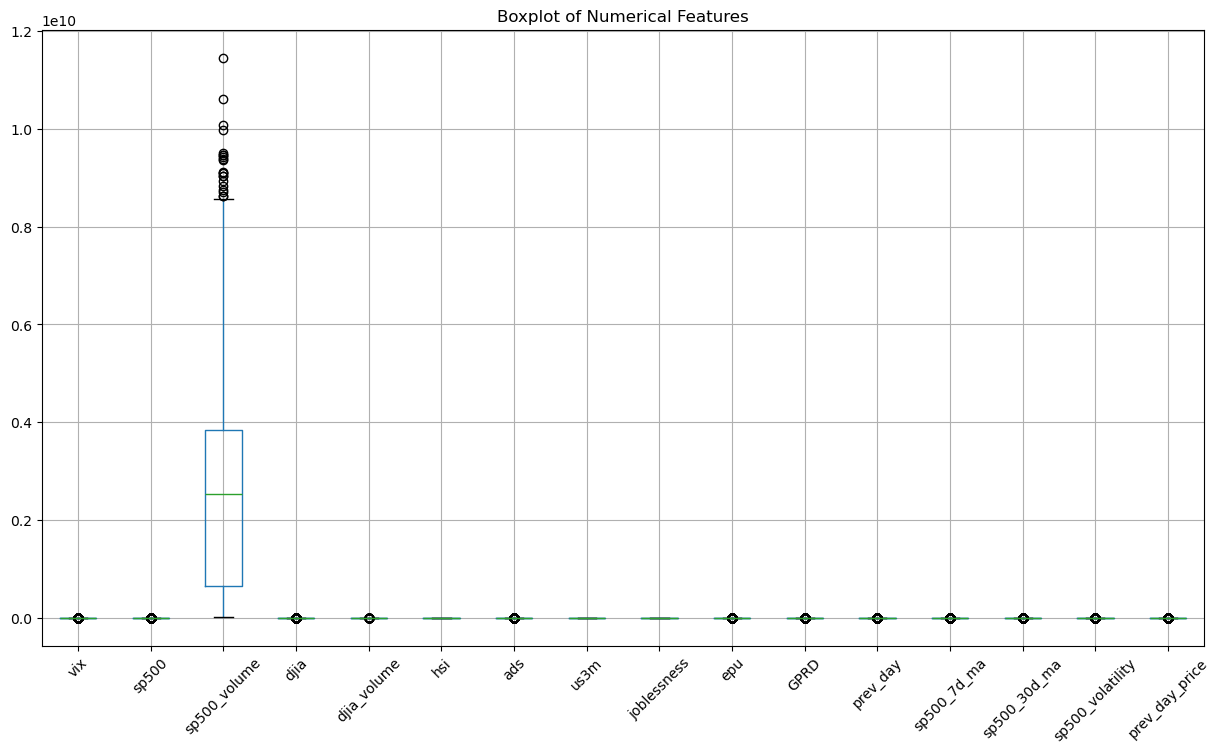

In [122]:
## Identifying Outliers

# Selecting numerical columns for outlier detection
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Boxplotting for each numeric column
plt.figure(figsize=(15, 8))
df[num_cols].boxplot(rot=45)
plt.title("Boxplot of Numerical Features")
plt.show()


In [123]:
## Attempt 1 for handling outliers 
import numpy as np
df['sp500_volume'] = np.log1p(df['sp500_volume'])  # log(1 + x) to handle zeros


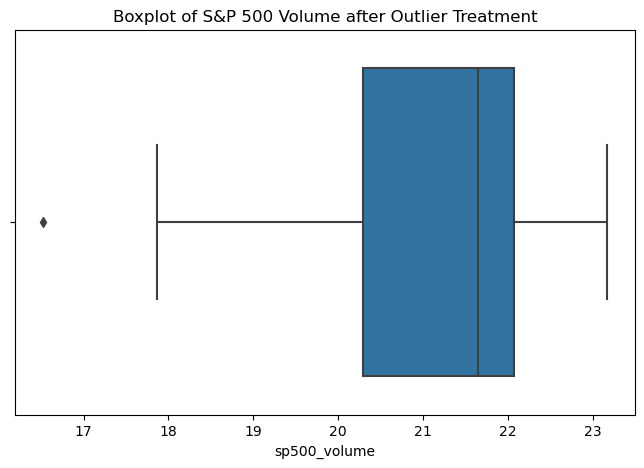

In [124]:
## Testing again for Outliers after Outlier Treatment
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['sp500_volume'])
plt.title("Boxplot of S&P 500 Volume after Outlier Treatment")
plt.show()


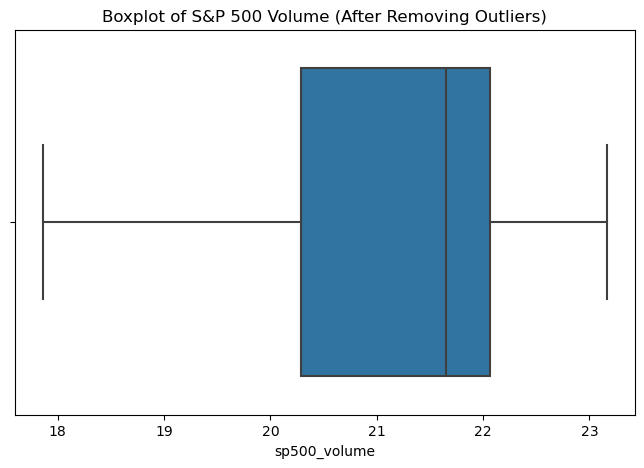

In [125]:

## Attempt 2 for Removing Outliers
## Removing Outliers using IQR Method
import numpy as np

# Calculating Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['sp500_volume'].quantile(0.25)
Q3 = df['sp500_volume'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Defining lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df_filtered = df[(df['sp500_volume'] >= lower_bound) & (df['sp500_volume'] <= upper_bound)]

# Replotting the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered['sp500_volume'])
plt.title("Boxplot of S&P 500 Volume (After Removing Outliers)")
plt.show()


In [126]:
## Saving the cleaned Dataset

df.to_csv("cleaned_dataset.csv", index=False)
